In [2]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [34]:
df = pd.read_csv("data/europisco.csv")

In [35]:
df.drop(columns=["Email Address", "Cuál es tu correo? (opcional)"], inplace=True)

In [36]:
df.rename(
    columns={
        "Timestamp": "timestamp",
        "Cúal es la dirección exacta (o más aproximada) dónde viste el pisco/restaurante?": "address_raw",
        "En qué país?": "country",
        "Qué era específicamente?": "category",
        "Cúanto costaba aproximadamente el pisco (en euros)?": "price",
        "Cuál es tu nombre? (opcional)": "name",
        "Probable address": "address_clean"
    },
    inplace=True
)

In [37]:
df.dropna(subset=['address_clean'], inplace=True)

In [38]:
df.reset_index(inplace=True, drop=True)

In [39]:
df

,timestamp,address_raw,country,category,price,name,address_clean
0,6/8/2024 22:34:22,"Rda. de Sant Antoni, 15, L'Eixample, 08011 Bar...",España,Botella,17.0,Joaquín Arretx,"Rda. de Sant Antoni, 15, L'Eixample, 08011 Bar..."
1,6/14/2024 17:40:03,"Ham 31, 9000 Gent",Bélgica,Botella,25.0,Sebastian,"Ham 31, 9000 Gent"
2,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Prenzlauer Promenade 192, 13189 Berlin, Germany"
3,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Kantstraße 42, 10625 Berlin, Germany"
4,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Berliner Str. 78, 14169 Berlin, Germany"
...,...,...,...,...,...,...,...
216,9/5/2024 21:06:50,Gall & Gall Rotterdam,Países Bajos,Botella,18.0,NaN,"Lijnbaan 119 B, 3012 EN Rotterdam, Netherlands"
217,9/5/2024 21:07:39,"Pita Delicatessen Schiedam, Rotterdam",Países Bajos,Restaurante,NaN,NaN,"Hoogstraat 68-72, 3111 HK Schiedam, Netherlands"
218,9/5/2024 22:53:34,"40 Rue Ferrari, Marsella, se llama Santo Cachon",Francia,Restaurante,NaN,NaN,"40 Rue Ferrari, 13005 Marseille, France"
219,9/6/2024 0:00:38,"Villarroel 22, 08011. Barcelona, España",España,Pisco Sour,10.0,Francis,"Villarroel 22, 08011. Barcelona, España"


In [40]:
# Quitamos direcciones duplicadas y nos quedamos con la primera
print("Antes de quitar duplicados:",df.shape[0])
df.drop_duplicates(["category","address_clean"], keep="first", inplace= True)
print("Sin duplicados:",df.shape[0])

Antes de quitar duplicados: 221
Antes de sin duplicados: 205


In [45]:
df.sample(5)

,timestamp,address_raw,country,category,price,name,address_clean
152,7/10/2024 9:17:55,"Carrer de bar raïm, Siracusa, 4, Gràcia, 08012...",España,Piscola,7.0,NaN,"Carrer de Siracusa, 4, Gràcia, 08012 Barcelona"
65,6/21/2024 10:16:05,"Spitalgasse 14, Zürich",Suiza,Pisco Sour,17.0,Matias cavero,"Spitalgasse 14, 8001 Zürich, Switzerland"
144,7/4/2024 15:11:50,"Via di S. Francesco a Ripa, 53, 00153 Roma RM",Italia,Botella,31.9,NaN,"Via di S. Francesco a Ripa, 53, 00153 Roma RM,..."
61,6/18/2024 12:26:54,"4 Leopold Sq, Sheffield City Centre, Sheffield...",Reino Unido,Pisco Sour,10.0,Hermes Uribe,"4 Leopold Sq, Sheffield City Centre, Sheffield..."
188,9/1/2024 16:54:03,"La tía rica , La tia Rica, Knesebeckstraße 92,...",Alemania,Restaurante,NaN,Vivi Arellano,"Knesebeckstraße 92, 10623 Berlin, Germany"


In [46]:
geolocator = Nominatim(user_agent="BuscandoElPisco")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, error_wait_seconds=2, max_retries=3)

# Create new columns for latitude and longitude
df['location'] = df['address_clean'].apply(geocode)
df['latitude'] = df['location'].apply(lambda loc: loc.latitude if loc else None)
df['longitude'] = df['location'].apply(lambda loc: loc.longitude if loc else None)

RateLimiter caught an error, retrying (0/3 tries). Called with (*('Via di S. Francesco a Ripa, 53, 00153 Roma RM, Italy',), **{}).
Traceback (most recent call last):
  File "/home/jarretx/europisco/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
  File "/home/jarretx/europisco/.venv/lib/python3.10/site-packages/urllib3/connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
  File "/usr/lib/python3.10/http/client.py", line 1375, in getresponse
    response.begin()
  File "/usr/lib/python3.10/http/client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.10/http/client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.10/ssl.py", line 1303, in recv_into
    return self.read(

In [47]:
df.query("location.isnull()")

,timestamp,address_raw,country,category,price,name,address_clean,location,latitude,longitude
6,6/14/2024 17:58:38,Bar Juana Brava en Salamanca,España,Piscola,6.0,Fabián,"Calle de Van Dyck, 13, 37005 Salamanca",None,NaN,NaN
18,6/15/2024 14:18:11,"Wine House, Rda. de Sant Antoni, 15, L'Eixampl...",España,Botella,23.0,NaN,"Wine House, Rda. de Sant Antoni, 15, L'Eixampl...",None,NaN,NaN
21,6/15/2024 15:49:08,"Bar L'Amistat, RAMON Y CAJAL 58, TORRIJOS 13, ...",España,Piscola,8.0,Joaquín Arretx,"RAMON Y CAJAL 58, TORRIJOS 13, 08012 Barcelona",None,NaN,NaN
23,6/16/2024 18:26:28,"Gran Vía de Don Diego López de Haro, 9, Abando...",España,Botella,13.0,Nico,"Gran Vía de Don Diego López de Haro, 9, Abando...",None,NaN,NaN
30,6/16/2024 19:44:25,El corte inglés Valencia Centro,España,Botella,35.0,"Eduardo ""Piscola"" Segovia","Calle del Pintor Sorolla, 26, 46002, Ciutat Ve...",None,NaN,NaN
32,6/16/2024 20:23:57,Barrio de gracia Barcelona,España,Piscola,15.0,Bar kiltro,"Carrer del Montseny, 13, Local 2, Gracia, 0801...",None,NaN,NaN
45,6/16/2024 22:02:36,En la Garrafeira Nacional en Lisboa www.garraf...,Portugal,Botella,27.0,Erika,"R. de Santa Justa 18, 1100-485 Lisboa, Portugal",None,NaN,NaN
47,6/16/2024 22:18:21,"45 Hogan Pl, Dublin 2, D02 RF34",Irlanda,Pisco Sour,12.0,Dani,"45 Hogan Pl, Dublin 2, D02 RF34, Ireland",None,NaN,NaN
48,6/16/2024 22:19:24,"Charlotte Quay Dock, Millennium Tower, Ground ...",Irlanda,Pisco Sour,13.0,Dani,"Charlotte Quay Dock, Millennium Tower, Ground ...",None,NaN,NaN
49,6/16/2024 23:06:02,"Bar L’Amistat: RAMON Y CAJAL 58, TORRIJOS 13, ...",España,Piscola,8.0,Nico,"Bar L’Amistat: RAMON Y CAJAL 58, TORRIJOS 13, ...",None,NaN,NaN


In [52]:
df.loc[6, "latitude"] = 40.972546300325746
df.loc[6, "longitude"] = -5.658419387328101
df.loc[18, "latitude"] = 41.38006562275075
df.loc[18, "longitude"] = 2.163010839291413
df.loc[21, "latitude"] = 41.40293279969603
df.loc[21, "longitude"] = 2.159256096961093
df.loc[23, "latitude"] = 43.26163372566617
df.loc[23, "longitude"] = -2.929120933831521
df.loc[30, "latitude"] = 39.47078392527955
df.loc[30, "longitude"] = -0.37138733009770314
df.loc[32, "latitude"] = 41.40191119891952
df.loc[32, "longitude"] = 2.154507805637604
df.loc[45, "latitude"] = 38.7127794867824
df.loc[45, "longitude"] = -9.137327763919329
df.loc[47, "latitude"] = 53.34083826660188
df.loc[47, "longitude"] = -6.24482527367974
df.loc[48, "latitude"] = 53.342904383050765
df.loc[48, "longitude"] = -6.236903285325631
df.loc[49, "latitude"] = 41.40290997130236
df.loc[49, "longitude"] = 2.1592672681276954
df.loc[51, "latitude"] = 51.90172595208701
df.loc[51, "longitude"] = -8.470310360254798
df.loc[52, "latitude"] = 38.709764127838696
df.loc[52, "longitude"] = -9.151407431973473
df.loc[59, "latitude"] = 46.22150670601297
df.loc[59, "longitude"] = 6.0956530670457125
df.loc[69, "latitude"] = 40.4292948540896
df.loc[69, "longitude"] = -3.673644174454475
df.loc[73, "latitude"] = 38.964916663935924
df.loc[73, "longitude"] = -9.417234623696746
df.loc[86, "latitude"] = 39.61589090757615
df.loc[86, "longitude"] = 2.705252368571537
df.loc[88, "latitude"] = 38.909667696473214
df.loc[88, "longitude"] = 1.4355332133343959
df.loc[113, "latitude"] = 40.41763629833717
df.loc[113, "longitude"] = -3.704811116568445
df.loc[120, "latitude"] = 51.51430664403254
df.loc[120, "longitude"] = -0.17540551511112104
df.loc[121, "latitude"] = 41.554654136702574
df.loc[121, "longitude"] = 2.0986853875424276
df.loc[122, "latitude"] = 53.347946518816215
df.loc[122, "longitude"] = -6.261642988640728
df.loc[144, "latitude"] = 41.886411780046295
df.loc[144, "longitude"] = 12.472420643711015
df.loc[156, "latitude"] = 39.962617683800325
df.loc[156, "longitude"] = -4.817903422418324
df.loc[164, "latitude"] = 36.722722720729806
df.loc[164, "longitude"] = -4.421907362981686
df.loc[168, "latitude"] = 52.335601064944704
df.loc[168, "longitude"] = -6.459070773663258
df.loc[174, "latitude"] = 51.51430664403254
df.loc[174, "longitude"] = -0.17540551511112104
df.loc[183, "latitude"] = 47.56107982868368
df.loc[183, "longitude"] = 7.592640489055312
df.loc[187, "latitude"] = 52.41953431610891
df.loc[187, "longitude"] = 9.792439901292278
df.loc[193, "latitude"] = 52.62872890971545
df.loc[193, "longitude"] = 1.292831732093453
df.loc[195, "latitude"] = 53.347946518816215
df.loc[195, "longitude"] = -6.261642988640728
df.loc[203, "latitude"] = 40.40772969233442
df.loc[203, "longitude"] = -3.703651318600535
df.loc[204, "latitude"] = 51.51430664403254
df.loc[204, "longitude"] = -0.17540551511112104
df.loc[213, "latitude"] = 53.34086289380278
df.loc[213, "longitude"] = -6.244776361603958
df.loc[214, "latitude"] = 50.81501521279863
df.loc[214, "longitude"] = 4.367106972592874

In [53]:
df.head(5)

,timestamp,address_raw,country,category,price,name,address_clean,location,latitude,longitude
0,6/8/2024 22:34:22,"Rda. de Sant Antoni, 15, L'Eixample, 08011 Bar...",España,Botella,17.0,Joaquín Arretx,"Rda. de Sant Antoni, 15, L'Eixample, 08011 Bar...","(Farmàcia Ventura Cebrià,Enric, 15, Ronda de S...",41.379950,2.163068
1,6/14/2024 17:40:03,"Ham 31, 9000 Gent",Bélgica,Botella,25.0,Sebastian,"Ham 31, 9000 Gent","(31, Huidevetterskaai, Waterwijk, Gent, Oost-V...",51.060588,3.728483
2,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Prenzlauer Promenade 192, 13189 Berlin, Germany","(Mitte Meer, 192, Prenzlauer Promenade, Prenzl...",52.551766,13.429981
3,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Kantstraße 42, 10625 Berlin, Germany","(Mitte Meer, 42, Kantstraße, Charlottenburg, C...",52.506538,13.312701
4,6/14/2024 17:48:40,Mitte Meer Shop (Berlin),Alemania,Botella,18.0,Bernardo Suárez,"Berliner Str. 78, 14169 Berlin, Germany","(Mitte Meer, 78, Berliner Straße, Zehlendorf, ...",52.439565,13.276804


In [10]:
df_pisco = df[df["category"] != "Restaurante"].copy()
df_restaurante = df[df["category"] == "Restaurante"].copy()

In [11]:
df.to_csv("./processed/europisco_location.csv", index=False)
df_pisco.to_csv("./processed/pisco.csv", index=False)
df_restaurante.to_csv("./processed/restaurante.csv", index=False)

In [56]:
# Create a map centered around Europe
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

# Define all possible pisco types
categories = ["Botella", "Piscola", "Pisco Sour"]

# Create a feature group for each pisco type and combination
feature_groups = {ptype: folium.FeatureGroup(name=ptype).add_to(m) for ptype in categories}

# Function to add markers to the map
def add_marker(row):
    popup_text = f"Tipo: {row['category']}<br>Precio: {row['price']}<br>Subido por: {row['name']}<br>Dirección: {row['address_clean']}"
    categories_in_row = row['category'].split(", ")
    for category in categories_in_row:
        if category in feature_groups:
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=popup_text,
                tooltip=row['category']
            ).add_to(feature_groups[category])

# Apply the function to each row in the dataframe
df.apply(add_marker, axis=1)

# Add LayerControl to the map
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('out/pisco_map.html')

# Stats

In [57]:
df.query("category.str.contains('botella', case=False)").sort_values("price")

,timestamp,address_raw,country,category,price,name,address_clean,location,latitude,longitude
19,6/15/2024 15:09:22,El Corte Inglés supermercado nuevos ministerio...,España,Botella,1.0,Paulina,"C. de Raimundo Fernández Villaverde, 65, Tetuá...","(El Corte Inglés, 65, Calle de Raimundo Fernán...",40.447000,-3.693587
158,7/14/2024 9:29:33,"Via Feltrina, 53, 31040 Pederobba TV el superm...",Italia,Botella,12.0,Crystal,"Via Feltrina, 53, 31040 Pederobba TV, Italy","(Iper Tosano, 53, Via Feltrina, Pederobba, Tre...",45.870600,11.963741
23,6/16/2024 18:26:28,"Gran Vía de Don Diego López de Haro, 9, Abando...",España,Botella,13.0,Nico,"Gran Vía de Don Diego López de Haro, 9, Abando...",None,43.261634,-2.929121
13,6/14/2024 23:11:19,"C. de Villarroel, 18, L'Eixample, 08011 Barcelona",España,Botella,13.0,Maggi Mansilla Casiccia,"C. de Villarroel, 18, L'Eixample, 08011 Barcelona","(18, Carrer de Villarroel, Sant Antoni, Eixamp...",41.381568,2.162010
86,6/25/2024 15:53:57,"Ctra. Inca -Afor Ctra. Palma, 47, 07141 Marrat...",España,Botella,13.0,Marcelo,"Ctra. Inca -Afor Ctra. Palma, 47, 07141 Marrat...",None,39.615891,2.705252
...,...,...,...,...,...,...,...,...,...,...
51,6/17/2024 0:59:11,"21 Coburg St, Victorian Quarter, Cork, T23 CR23",Irlanda,Botella,40.0,Marcela Bravo,"21 Coburg St, Victorian Quarter, Cork, T23 CR2...",None,51.901726,-8.470310
172,7/22/2024 11:56:15,Reyndersstraat 8 Antwerpen,Bélgica,Botella,40.0,Ale,"Reyndersstraat 8, 2000 Antwerpen, Belgium","(Almacén, 8, Reyndersstraat, Historisch Centru...",51.219307,4.398587
101,6/26/2024 17:21:03,"1179 Pollokshaws Rd, Shawlands, Glasgow G41 3YH",Reino Unido,Botella,43.0,Soledad,"1179 Pollokshaws Rd, Shawlands, Glasgow G41 3Y...","(Phillies of Shawlands, 1179, Pollokshaws Road...",55.829941,-4.282292
9,6/14/2024 20:34:17,"Industriepark-Noord 35, 9100 Sint-Niklaas",Bélgica,Botella,50.0,Milena,"Industriepark-Noord 35, 9100 Sint-Niklaas","(De Vidts, 35, Industriepark Noord, Hertje, Si...",51.151284,4.160866


In [58]:
df["category"].value_counts()

category
Botella        115
Piscola         46
Restaurante     25
Pisco Sour      17
Name: count, dtype: int64

In [42]:
df["country"].value_counts()

country
España             77
Alemania           40
Suiza              12
Irlanda            11
Países Bajos       10
Reino Unido        10
Italia             10
Francia            10
Bélgica             8
Portugal            3
Dinamarca           3
Austria             2
Suecia              1
Finlandia           1
Luxemburgo          1
San Marino          1
Malta               1
Armenia             1
Croacia             1
República Checa     1
Andorra             1
Name: count, dtype: int64

<Axes: >

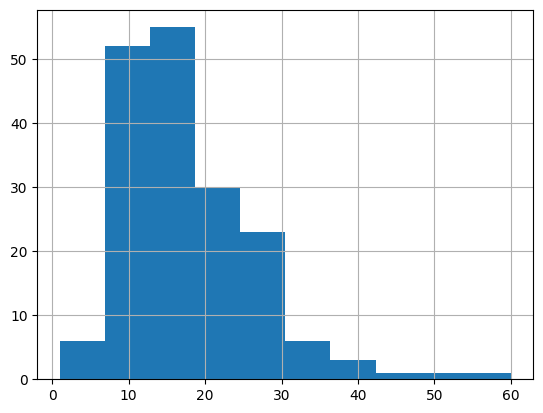

In [ ]:
df.price.hist()

In [ ]:
df.price.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    178.000000
mean      17.409213
std        9.091725
min        1.000000
1%         5.000000
10%        8.000000
25%       10.000000
50%       16.000000
75%       22.750000
90%       30.000000
99%       44.610000
max       60.000000
Name: price, dtype: float64